# Pytanic - Exploring the Titanic through Python

Hello and Welcome to my Guide to predict the survivability of the famous Kaggle competition.

The Basic Stages of the notebook are as follows:
1. Objective
2. Data Understanding
3. Data Preparation
4. Model Building
  * 4a. Instantiate
  * 4b. Fit
  * 4c. Predict
  * 4d. Score
5. Results/Model Evaluation

> ## Objective
To Predict the Survivability of travellers on the RMS Titanic. The dataset is broken into training and test datasets. We need to use the `train` dataset and apply ML techniques to predict the Survived variable `(0=Did not Survive ; 1=Survived)` on the `test` data.
Things to Check:
* Q> Are Females more prone to Surviving?
* Q> Are kids more prone to surviving?
* Q> Is there any relationship beteen the class of the passenger and surviving?

## 2. Data Understanding

### Load the Data

In [387]:
# Import all the necessary packages. Packages loaded later in code as well as and when required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [388]:
# Import the DataSets

df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Explore the Data

In [389]:
# Checking Distributions

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [390]:
# Separating the Vairable Types

display("Categorical Variables", df_train.dtypes[(df_train.dtypes == object)])
display("Continuous Variables", df_train.dtypes[(df_train.dtypes != object)])

'Categorical Variables'

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

'Continuous Variables'

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [391]:
# Show the columns with missing values

display(df_train.isnull().sum()[(df_train.isnull().sum() > 0)]);
display(df_test.isnull().sum()[(df_test.isnull().sum() > 0)])
print("total rows = ", df_train.shape[0]+df_test.shape[0])

Age         177
Cabin       687
Embarked      2
dtype: int64

Age       86
Fare       1
Cabin    327
dtype: int64

total rows =  1309


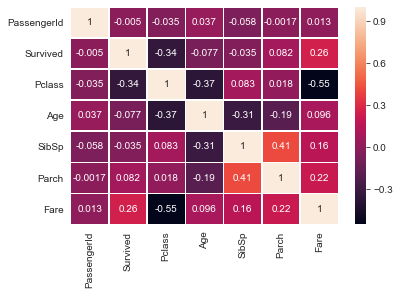

In [392]:
# Check visual correlation plot

#plt.figure(figsize = (12,8))
sns.heatmap(df_train.corr(), annot=True, linewidths=.5);

> **Notable Features from this correlation plot**
* ***Survived***, the DV has strong -ve correlation with ***Pclass***
* ***Survived*** is positively correlated to ***Fare***
* ***Fare*** and ***Pclass*** are nevatively correlated, which explains the above points
* ***Pclass*** also has a negative correlation with ***Age*** which says that older people preferred 1st class
* ***Age*** is inversely related to ***Sibling/Spouse*** :: Lower aged has more siblings/spouse
* ***Parent/Children*** also has a direct correlation with ***Siblings/Spouse***. Says that they prefer travelling with family.

### Univariate and Bivariate Explorations

#### Exploring Pclass

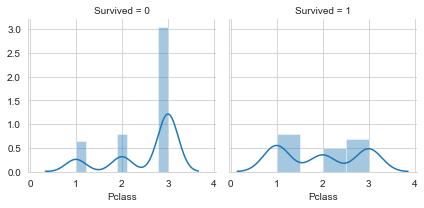

In [393]:
# Survived vs Pclass
g= sns.FacetGrid(df_train,col='Survived')
g.map(sns.distplot,'Pclass');

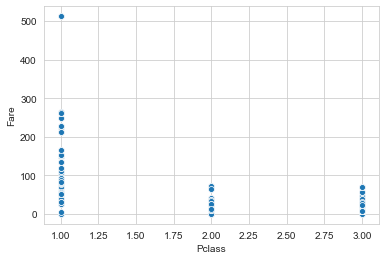

In [394]:
# Pclass vs Fare
sns.scatterplot(x='Pclass',y='Fare',data=df_train,palette='summer');

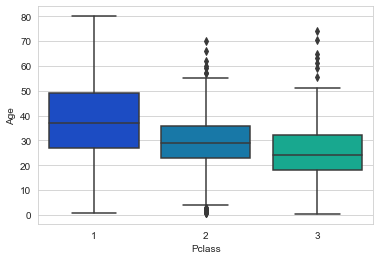

In [395]:
# Pclass vs age
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter');

#### Exploring Age

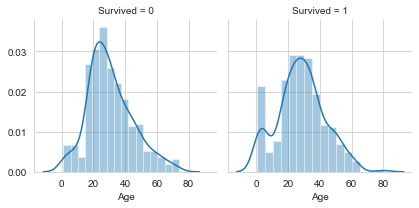

In [396]:
# Survived vs Age
g= sns.FacetGrid(df_train,col='Survived')
g.map(sns.distplot,'Age');

#### Exploring Fare

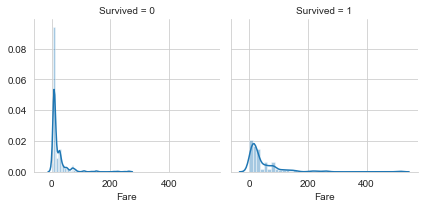

In [397]:
# Survived vs Fare
g= sns.FacetGrid(df_train,col='Survived')
g.map(sns.distplot,'Fare');

#### Exploring SibSp

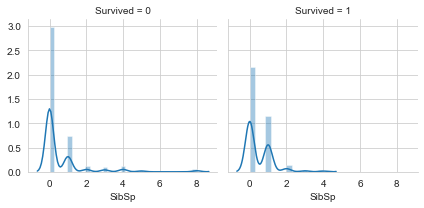

In [398]:
# Survived vs Sibsp
g= sns.FacetGrid(df_train,col='Survived')
g.map(sns.distplot,'SibSp');

### Multivariate Analysis

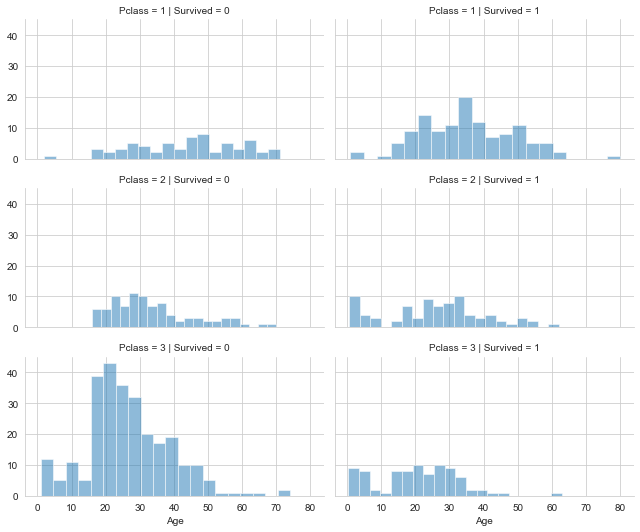

In [399]:
# Survived vs Pclass vs Age

g = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=2.5, aspect=1.8)
g.map(plt.hist, 'Age', alpha=.5, bins=20);

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


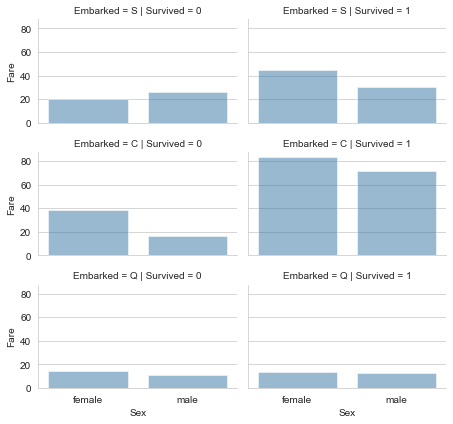

In [400]:
# Survived vs Fare vs Embarked

g = sns.FacetGrid(df_train, row='Embarked', col='Survived', height=2, aspect=1.6)
g.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None);

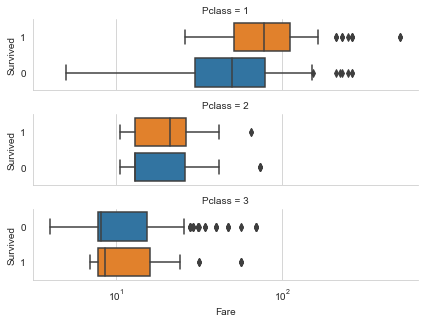

In [401]:
# Survived vs Pclass vs Fare
g = sns.catplot(x="Fare", y="Survived", row="Pclass", kind="box", orient="h", height=1.5, aspect=4, data=df_train.query("Fare > 0"))
g.set(xscale="log");

### Survived vs other variables

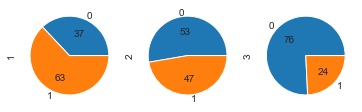

In [402]:
# Pclass
pd.crosstab(df_train['Survived'], df_train['Pclass']).plot(kind='pie', subplots=True, autopct='%.0f',legend=False);

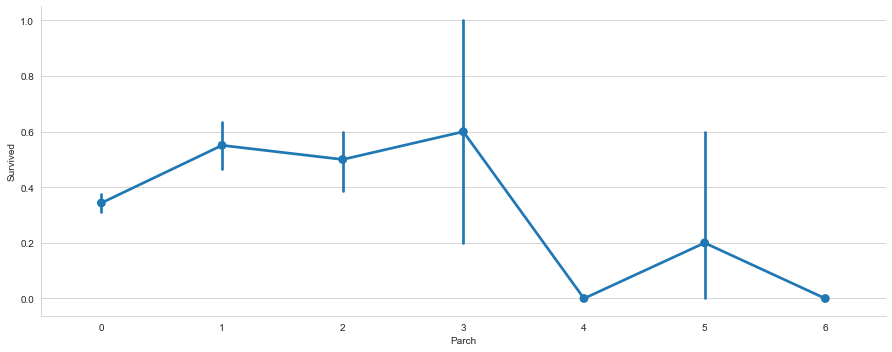

In [414]:
# Parch
sns.factorplot('Parch','Survived', data=df_train, aspect = 2.5);

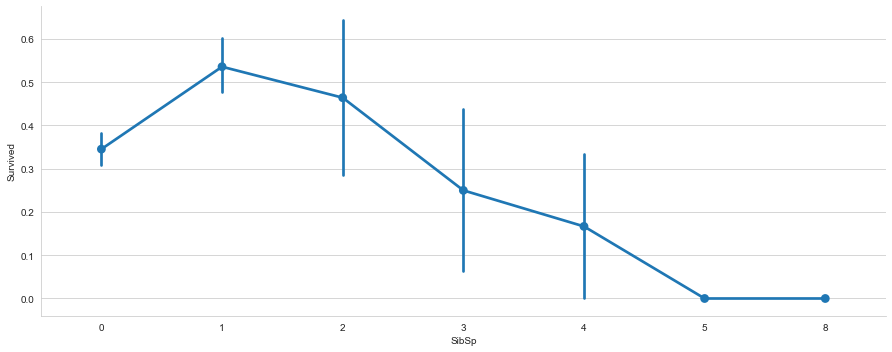

In [404]:
# SibSp
sns.factorplot('SibSp', 'Survived',data=df_train, aspect = 2.5);

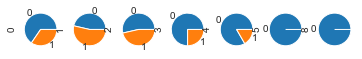

In [405]:
pd.crosstab(df_train['Survived'], df_train['SibSp']).plot(kind='pie', subplots=True, legend=False);

In [406]:
# Fare
df_train.groupby('Survived').Fare.mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

> Key Findings:
* Yes, women are more prone to survival, the graphical plots show the same
* Yes, children are more prone to survival
* Yes, the pclass is differentiator between survival

## 3. Data Preparation

### Cleaning Data

In [407]:
# creating copy dataset of train
df_train_clean = df_train.copy()
df_train_clean.shape

(891, 12)

#### Removing Outliers

In [408]:
df_train_clean = df_train_clean[df_train_clean['SibSp'] < 8]
df_train_clean.shape

(884, 12)

In [409]:
df_train_clean = df_train_clean[df_train['Fare'] < 500];
df_train_clean.shape

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(881, 12)

### Merging Test and Train (*to impute values in both*)

In [410]:
df = pd.concat([df_train_clean, df_test], ignore_index=True, sort=False)
df.set_index('PassengerId', inplace=True)

print(df.shape)
df.head()

(1299, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [380]:
df.isnull().sum()[(df.isnull().sum() > 0)]

Survived     418
Age          256
Fare           1
Cabin       1006
Embarked       2
Ticketid     418
dtype: int64

### Featurizing (Creating Additional Columns)

#### Fare

#### Familia = Total Family = Parents + Children + Siblings + Spouse

In [344]:
# Creating total Family Variable

df['Familia'] = df.Parch + df.SibSp

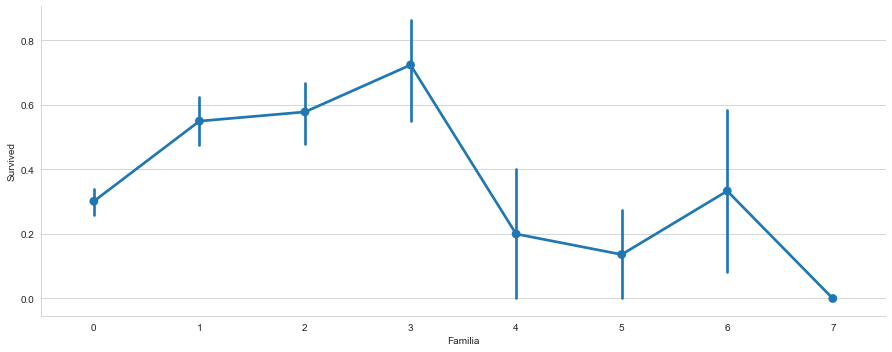

In [345]:
# Check Familia with Survived from Training Set only
sns.factorplot('Familia','Survived', data=df[df.index.isin(df_train.index)], aspect = 2.5);

#### Title and Name

In [346]:
# Create Title Column by extracting the Title from Name

df['Title'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
print("Missing Values in Title", df.Title.isnull().sum())
pd.crosstab(df['Sex'], df['Title'])

Missing Values in Title 0


Title,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,256,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,60,0,0,0,752,0,0,8,1,0


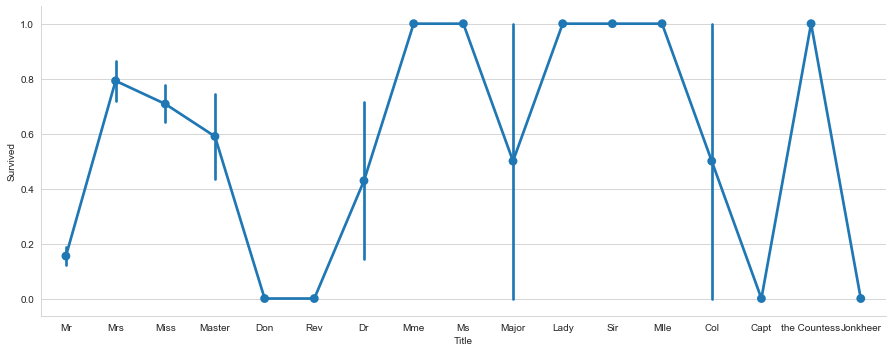

In [347]:
sns.factorplot('Title','Survived', data=df[df.index.isin(df_train.index)], aspect = 2.5);

In [348]:
# Grouping Titles

title_replace = {
    'Don': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7
}

df['Title_Flag'] = df['Title'].apply(lambda x: title_replace.get(x))

In [349]:
# Gathering Name Length and dropping Name

df['NameLen'] = df['Name'].apply(lambda x: len(x))
df.drop(['Name'], axis=1, inplace=True)

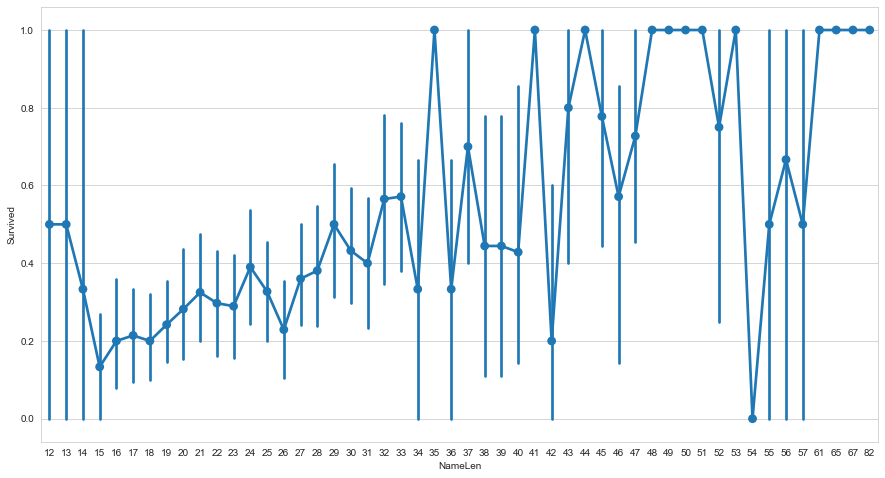

In [350]:
sns.pointplot(x='NameLen',y='Survived', data=df[df.index.isin(df_train.index)]);

#### Cabin ID from Cabin

In [358]:
# Cabin vs Fare

df.groupby('CabinID').Fare.mean()

CabinID
A     41.244314
B    110.003837
C    107.926598
D     53.007339
E     54.564634
F     18.079367
G     14.205000
T     35.500000
X     18.290799
Name: Fare, dtype: float64

In [362]:
# Cabin vs Class

pd.crosstab(df['CabinID'], df['Pclass'])

Pclass,1,2,3
CabinID,,,
A,22,0,0
B,63,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
T,1,0,0
X,66,254,686


In [370]:
df[df.Ticket == 'LINE']

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familia,Title,Title_Flag,NameLen,CabinID,Cabin_Flag,Ticketid
PassengerId,,,,,,,,,,,,,,,,,
180,0.0,3,male,36.0,0,0,LINE,0.0,X,S,0,Mr,1.0,19,X,1,
272,1.0,3,male,25.0,0,0,LINE,0.0,X,S,0,Mr,1.0,28,X,1,
303,0.0,3,male,19.0,0,0,LINE,0.0,X,S,0,Mr,1.0,31,X,1,
598,0.0,3,male,49.0,0,0,LINE,0.0,X,S,0,Mr,1.0,19,X,1,


In [371]:
df[(df['Pclass'] == 1) & (df['CabinID'] == 'X')].Fare.mean()

63.57026212121215

In [351]:
# Creating a CabinID Flag. Filling in missing Cabin as X

df['Cabin'].fillna('X', inplace=True)
df['CabinID'] = df['Cabin'].apply(lambda x: x[0])
df.CabinID.value_counts()

X    1006
C      94
B      63
D      46
E      41
A      22
F      21
G       5
T       1
Name: CabinID, dtype: int64

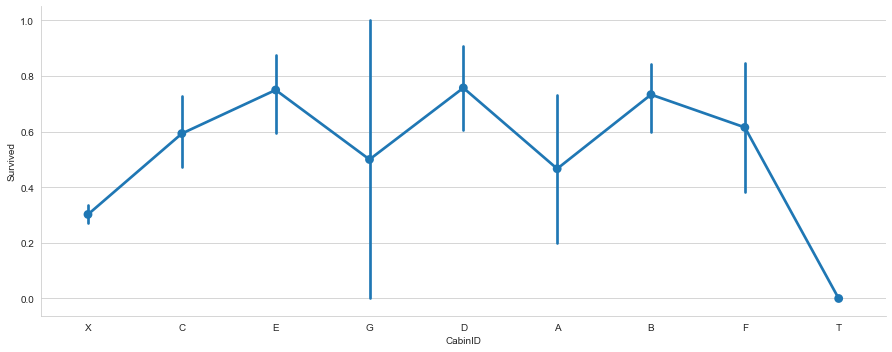

In [352]:
sns.factorplot('CabinID','Survived', data=df[df.index.isin(df_train.index)], aspect = 2.5);

In [355]:
cabin_replace = {
    'T': 0,
    'X': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

df['Cabin_Flag'] = df['CabinID'].apply(lambda x: cabin_replace.get(x))

In [356]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familia,Title,Title_Flag,NameLen,CabinID,Cabin_Flag
PassengerId,,,,,,,,,,,,,,,,
1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,X,S,1,Mr,1.0,23,X,1
2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,6.0,51,C,4
3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,0,Miss,5.0,22,X,1
4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,6.0,44,C,4
5,0.0,3,male,35.0,0,0,373450,8.0500,X,S,0,Mr,1.0,24,X,1
6,0.0,3,male,NaN,0,0,330877,8.4583,X,Q,0,Mr,1.0,16,X,1
7,0.0,1,male,54.0,0,0,17463,51.8625,E46,S,0,Mr,1.0,23,E,7
8,0.0,3,male,2.0,3,1,349909,21.0750,X,S,4,Master,4.0,30,X,1
9,1.0,3,female,27.0,0,2,347742,11.1333,X,S,2,Mrs,6.0,49,X,1


#### Exploring Ticket String

In [368]:
# breakdown the Ticket and find Strings in them
# df[['Ticketa','Ticketb','Ticketc']] = df.Ticket.str.rsplit(' ', n=2, expand=True)  :: does not work

split_tickets = df['Ticket'].str.rsplit(n=1)
prefixes = [sp[0] if len(sp) == 2 else '' for sp in split_tickets]
df['Ticketid'] = prefixes
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familia,Title,Title_Flag,NameLen,CabinID,Cabin_Flag,Ticketid
PassengerId,,,,,,,,,,,,,,,,,
1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,X,S,1,Mr,1.0,23,X,1,A/5
2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,6.0,51,C,4,PC
3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,0,Miss,5.0,22,X,1,STON/O2.
4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,6.0,44,C,4,
5,0.0,3,male,35.0,0,0,373450,8.0500,X,S,0,Mr,1.0,24,X,1,


In [369]:
# Who pays so much?????
# len(df_train[df_train['Fare'] > 200])  #20 people paid >200 :O
df_train[df_train['Fare'] > 200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticketid
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,PC
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,PC
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,PC
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,PC
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,PC
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,


In [302]:
df_train.Ticketid.value_counts()

               665
PC              60
C.A.            27
STON/O 2.       12
A/5             10
W./C.            9
CA.              8
SOTON/O.Q.       8
A/5.             7
SOTON/OQ         7
STON/O2.         6
CA               6
F.C.C.           5
SC/PARIS         5
S.O.C.           5
C                5
SC/Paris         4
A/4.             3
S.O./P.P.        3
A/4              3
PP               3
S.C./PARIS       2
P/PP             2
SOTON/O2         2
WE/P             2
SC/AH            2
A./5.            2
A.5.             2
SCO/W            1
Fa               1
S.O.P.           1
W.E.P.           1
S.W./PP          1
C.A./SOTON       1
S.C./A.4.        1
A4.              1
A/S              1
W/C              1
SC               1
SC/AH Basle      1
SW/PP            1
SO/C             1
F.C.             1
S.P.             1
Name: Ticketid, dtype: int64

### Imputing Values

#### Age

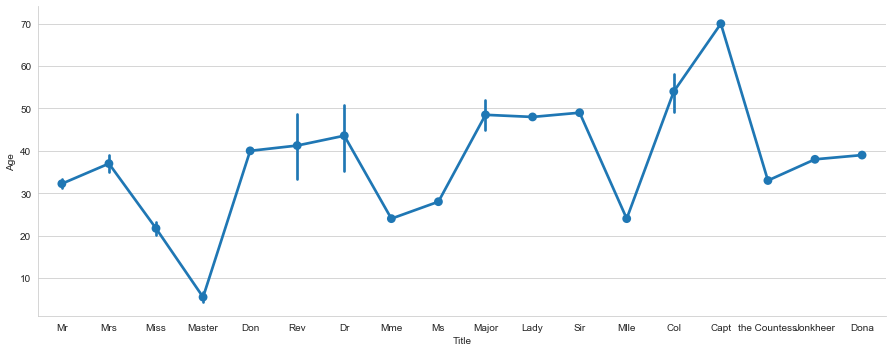

In [333]:
sns.factorplot('Title','Age', data=df, aspect = 2.5);

In [298]:
df[df.Age.isnull()].Title.value_counts()

Mr        173
Miss       47
Mrs        27
Master      7
Ms          1
Dr          1
Name: Title, dtype: int64

In [300]:
df[df.Age.isnull()].Familia.value_counts()

0     200
1      29
2      15
4       5
3       4
10      3
Name: Familia, dtype: int64

In [308]:
df.groupby('Familia').Age.mean()

Familia
0     31.500000
1     32.710976
2     26.534097
3     19.423333
4     23.764706
5     20.120000
6     17.375000
7     18.000000
10    14.500000
Name: Age, dtype: float64

In [312]:
df.groupby('Title').Age.mean()

Title
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.710957
Mlle            24.000000
Mme             24.000000
Mr              32.240933
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [ ]:
temp=df.loc[(df['Pclass']==3) & (df['Parch']==0) & (df['SibSp']==0) & (df['Fare']>0)].sort_values(by=['Fare'],ascending=False)
temp.head()

In [ ]:
df['Fare']=df['Fare'].fillna(temp['Fare'].mean())

In [ ]:
nullAgeSubset=df.loc[df['Age'].isnull()]
nullAgeSubset.shape

In [ ]:
for index in nullAgeSubset.index:
    ageSubsetMean=df['Age'].loc[(df['Parch']==nullAgeSubset.loc[index]['Parch'])&(df['SibSp']==nullAgeSubset.loc[index]['SibSp'])&(df['Pclass']==nullAgeSubset.loc[index]['Pclass'])&(df['Embarked']==nullAgeSubset.loc[index]['Embarked'])&(df['Sex']==nullAgeSubset.loc[index]['Sex'])].mean()
    if(ageSubsetMean>0):
        df['Age'].loc[index]=ageSubsetMean
    else:
        ageSubsetMean=df['Age'].loc[(df['Parch']==nullAgeSubset.loc[index]['Parch'])&(df['SibSp']==nullAgeSubset.loc[index]['SibSp'])&(df['Pclass']==nullAgeSubset.loc[index]['Pclass'])&(df['Embarked']==nullAgeSubset.loc[index]['Embarked'])].mean()
        if(ageSubsetMean>0):
            df['Age'].loc[index]=ageSubsetMean
        else:
            ageSubsetMean=df['Age'].loc[(df['Parch']==nullAgeSubset.loc[index]['Parch'])&(df['SibSp']==nullAgeSubset.loc[index]['SibSp'])&(df['Pclass']==nullAgeSubset.loc[index]['Pclass'])].mean()
            if(ageSubsetMean>0):
                df['Age'].loc[index]=ageSubsetMean
            else:
                df['Age'].loc[index]=df['Age'].mean()
                

In [ ]:
df.isnull().sum()

In [ ]:
df.drop(['Cabin','Name','Ticket'],axis=1, inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

### Featurizing / Prepping Data + Standardizing and Breaking into Train/Test

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

df['Embarked']=LabelEncoder().fit_transform(df['Embarked'])
df['Sex']=LabelEncoder().fit_transform(df['Sex'])
df['Age']=StandardScaler().fit_transform(np.array(df['Age']).reshape(-1,1))
df['Fare']=StandardScaler().fit_transform(np.array(df['Fare']).reshape(-1,1))

In [ ]:
df.describe()

In [ ]:
df_train_final = df[df.Survived.notnull()]
df_test_final = df[df.Survived.isnull()].drop(['Survived'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (df_train_final.drop(['Survived'], axis=1),
                                                     df_train_final['Survived'], 
                                                     test_size=0.1,random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

## 4. Model Building

### Load the Required Libraries

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
param_test1 = {
    'n_estimators': [100,200,500,750,1000],
    'max_depth': [3,5,7,9],
    'min_child_weight': [1,3,5],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05, 0.1, 1],
    'learning_rate': [0.01, 0.02, 0.05, 0.1]
}
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gsearch1 = GridSearchCV(estimator = XGBClassifier(), 
                       param_grid = param_test1, 
                       scoring=scoring, iid=False,
                       cv=5, verbose = 5, 
                       refit='Accuracy')
gsearch1.fit(X_train, Y_train)
The grid search returns the following as the best parameter set:
{learning_rate=0.02, n_estimators=750,
                   max_depth= 3, min_child_weight= 1, 
                   colsample_bytree= 0.6, gamma= 0.0, 
                   reg_alpha= 0.001, subsample= 0.8}
Now let’s try to implement the XGBoost model with these set of parameters:
# Instantiate our model
xg = XGBClassifier(learning_rate=0.02, n_estimators=750,
                   max_depth= 3, min_child_weight= 1, 
                   colsample_bytree= 0.6, gamma= 0.0, 
                   reg_alpha= 0.001, subsample= 0.8
                  )
xg.fit(X_train, Y_train)
xg_predictions = xg.predict(X_test)
xg_data = pd.read_csv('test.csv')
xg_data.insert((xg_data.shape[1]),'Survived',xg_predictions)
xg_data.to_csv('XGBoost_SS_OH_FE_GSCV.csv')

### Fit Model and Predict

In [ ]:
model = XGBClassifier (learning_rate=0.001, n_estimators=50, max_depth=8)
model.fit (X_train, y_train)
accuracy_score (y_test, model.predict(X_test))

### Export the final output

In [ ]:
df_test_final['Survived'] = model.predict(df_test_final).astype(int)
df_test_final

In [ ]:
df_test_final[['Survived']].to_csv('output.csv')

## Results and Final Thoughts

Using the XGBoost algorithm yields better results, however, there are theories that simple models yield good results as well. This all depends on the features(variables) selected and tuning the hyperparameters.
I have had better models with Deciscion Tree and Logistic Regression as well in initail cases. Feel free to use your own algorithm and explore. Thats the key in building better models: Exploration !
Happy Coding :)